We are going to look at the overlap integral between two beams to find the transmitted power.

This proceeds as follows:
    - define a 2D spatial grid of extent^2 EXTENT = 10mm
    - define the modes of interest on this grid as functions returning the E field
        - Generally a Gaussian function  which takes the two waists and returns the E grid
    - We want a gaussian w=1875um and an ellipse w=1000um and 1200um
    - a fuction to find the transmission, which performs the normalised overlap integral between the modes provided

In [1]:
import numpy as np
import matplotlib.pyplot as plt

REALISTIC_LOSSES = 0.95

# Constants
PI = np.pi
CM = 1e-2
UM = 1e-6
NM = 1e-9

EXTENT = 0.5*CM
SIZE = 2**13

In [2]:
def gaussian2D(x: np.ndarray, y: np.ndarray, w: float, wy: float = None, angle: float = 0.0 * np.pi):
    """
    Returns the E field of a 2D gaussian evaluated over the grid defined by x,y

    REQUIRED
        x,y - np.meshgrid arrays
        w - Waist of the gaussian in the x direction

    OPTIONAL
        wy - Waist of the gaussian in the y direction
        angle - Clockwise rotation of the gaussian in the x,y plane
    
    This can be elliptical along any axis, we perform a rotation on the x,y grid to achieve this
    """
    if wy is None:  # if wy is not specified, assume circular
        wy = w

    vals = np.exp(-((x*np.cos(angle) - y*np.sin(angle))**2/(w**2) + (x*np.sin(angle) + y*np.cos(angle))**2/(wy**2)))
    # normalise |vals|^2 = 1
    return vals / np.sqrt(np.sum(vals**2))

def overlap_integral(mode1: np.ndarray, mode2: np.ndarray, x: np.ndarray = None, y: np.ndarray = None):
    """
    Returns the overlap integral of two modes, mode1 and mode2, over the grid defined by x,y
    """
    return np.sum(mode1 * mode2.conj())

def mode_power_transmission(mode1: np.ndarray, mode2: np.ndarray, x: np.ndarray = None, y: np.ndarray = None):
    """
    Returns the power transmission of mode1 through mode2
    """
    return np.abs(overlap_integral(mode1, mode2, x, y))**2


In [5]:

x = np.linspace(-EXTENT, EXTENT, SIZE)
y = np.linspace(-EXTENT, EXTENT, SIZE)
X, Y = np.meshgrid(x, y)

fiber_mode = gaussian2D(X, Y, 1875 * UM)
laser_mode = gaussian2D(X, Y, 1620 * UM, 2364 * UM)


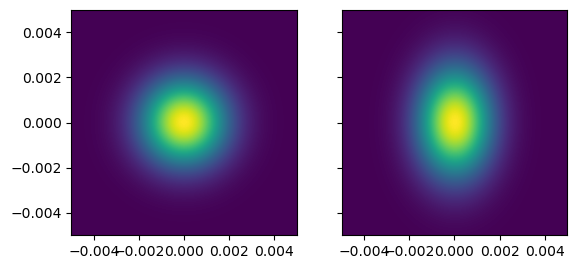

Transmission: 0.96
Realistic transmission is around 0.92


In [6]:
# plot the two modes side by side
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].imshow(np.abs(fiber_mode), extent=[-EXTENT, EXTENT, -EXTENT, EXTENT])
ax[1].imshow(np.abs(laser_mode), extent=[-EXTENT, EXTENT, -EXTENT, EXTENT])

plt.show()

# calculate the transmission of the laser mode through the fiber mode
transmission = mode_power_transmission(fiber_mode, laser_mode, x, y)
print(
    f"Transmission: {transmission:.2f}\nRealistic transmission is around {REALISTIC_LOSSES*transmission:.2f}"
)